## Introduction to Baseball Defensive Analytics

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import os
plt.style.use('ggplot')

In [2]:
fielding = pd.read_csv("jeter_fielding.csv")

In [3]:
awards = pd.read_csv("jeter_awards.csv")

In [4]:
awards.sort_values('count', ascending = False)

,awardID,count
2,Gold Glove,5
7,Silver Slugger,5
3,Hank Aaron Award,2
8,TSN All-Star,2
0,All-Star Game MVP,1
1,Babe Ruth Award,1
4,Lou Gehrig Memorial Award,1
5,Roberto Clemente Award,1
6,Rookie of the Year,1
9,World Series MVP,1


## World Series MVP
[!['3000 Hits'](http://img.youtube.com/vi/OHX8mmuodew/0.jpg)](http://www.youtube.com/watch?v=OHX8mmuodew)

# 3000 Hits
[!['3000 Hits'](http://img.youtube.com/vi/a5MJDtsBHwA/0.jpg)](http://www.youtube.com/watch?v=a5MJDtsBHwA)

# The Jeter Jump Throw
<img src="https://github.com/TravisRPetersen/sports-analytics-spring18/blob/master/lesson_02/images/jeter_jump.jpg?raw=true">

[!['Jeter Jump Throw'](http://img.youtube.com/vi/oxzR0RKRWTQ/0.jpg)](http://www.youtube.com/watch?v=oxzR0RKRWTQ)

## Fielding Percentage

Primary metric used to measure fielding throughout baseball history.

How to calculate:
   
* Sum of Putouts and Assists divided by Total Chances (Putouts, Assists, and Errors) 

In [5]:
fielding['Fielding_Percentage'] = fielding.apply(lambda row: (row['PO']+row['A'])/float(row['PO']+row['A']+row['E']), axis=1)
fielding.query('yearID==1998').sort_values('Fielding_Percentage', ascending=False).head(4)

,nameFirst,nameLast,yearID,InnOuts,PO,A,E,Fielding_Percentage
490,Omar,Vizquel,1998,3948.0,273.0,442.0,5.0,0.993056
59,Mike,Bordick,1998,3715.0,236.0,446.0,7.0,0.989840
275,Derek,Jeter,1998,3914.0,223.0,393.0,9.0,0.985600
120,Deivi,Cruz,1998,3490.0,196.0,445.0,11.0,0.983129


In [6]:
fielding['Fielding_Percentage_Rank'] = fielding.groupby(['yearID']).rank(ascending=False)['Fielding_Percentage']

Text(0.5,1,'Fielding Percentage \n Derek Jeter vs. League Average ')

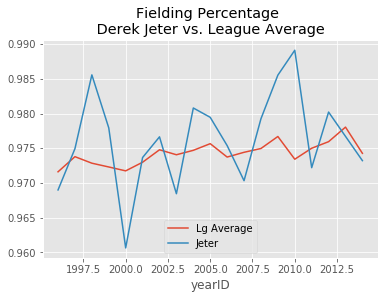

In [7]:
fig, ax = plt.subplots()
fielding.groupby('yearID')['Fielding_Percentage'].mean().plot(ax=ax)
fielding[fielding['nameLast']=='Jeter'].set_index('yearID')['Fielding_Percentage'].plot(ax=ax)
ax.legend(['Lg Average','Jeter'], loc=8)
plt.title('Fielding Percentage \n Derek Jeter vs. League Average ')

Text(0.5,1,'Derek Jeter Fielding Percentage Ranking')

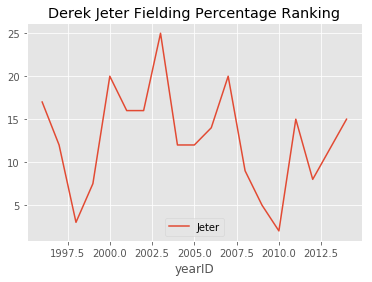

In [8]:
fig, ax = plt.subplots()
fielding[fielding['nameLast']=='Jeter'].set_index('yearID')['Fielding_Percentage_Rank'].plot(ax=ax)
ax.legend(['Jeter'], loc=8)
plt.title('Derek Jeter Fielding Percentage Ranking')

In [9]:
fielding[fielding['nameLast']=='Jeter']

,nameFirst,nameLast,yearID,InnOuts,PO,A,E,Fielding_Percentage,Fielding_Percentage_Rank
273,Derek,Jeter,1996,4112.0,244.0,444.0,22.0,0.969014,17.0
274,Derek,Jeter,1997,4251.0,244.0,457.0,18.0,0.974965,12.0
275,Derek,Jeter,1998,3914.0,223.0,393.0,9.0,0.985600,3.0
276,Derek,Jeter,1999,4187.0,230.0,391.0,14.0,0.977953,7.5
277,Derek,Jeter,2000,3837.0,237.0,349.0,24.0,0.960656,20.0
278,Derek,Jeter,2001,3936.0,212.0,343.0,15.0,0.973684,16.0
279,Derek,Jeter,2002,4149.0,219.0,367.0,14.0,0.976667,16.0
280,Derek,Jeter,2003,3102.0,159.0,271.0,14.0,0.968468,25.0
281,Derek,Jeter,2004,4026.0,273.0,392.0,13.0,0.980826,12.0
282,Derek,Jeter,2005,4059.0,262.0,454.0,15.0,0.979480,12.0


In [10]:
fielding[fielding['yearID']==1998].sort_values('Fielding_Percentage_Rank')

,nameFirst,nameLast,yearID,InnOuts,PO,A,E,Fielding_Percentage,Fielding_Percentage_Rank
490,Omar,Vizquel,1998,3948.0,273.0,442.0,5.0,0.993056,1.0
59,Mike,Bordick,1998,3715.0,236.0,446.0,7.0,0.989840,2.0
275,Derek,Jeter,1998,3914.0,223.0,393.0,9.0,0.985600,3.0
120,Deivi,Cruz,1998,3490.0,196.0,445.0,11.0,0.983129,4.0
167,Andy,Fox,1998,4072.0,382.0,177.0,10.0,0.982425,5.0
133,Gary,Disarcina,1998,4112.0,253.0,437.0,14.0,0.980114,6.0
190,Chris,Gomez,1998,3574.0,180.0,397.0,12.0,0.979626,7.0
438,Kevin,Stocker,1998,2820.0,186.0,335.0,11.0,0.979323,8.0
293,Barry,Larkin,1998,3708.0,207.0,361.0,12.0,0.979310,9.0
7,Rich,Aurilia,1998,2754.0,154.0,313.0,10.0,0.979036,10.0


## Range Factor

How to calculate: 
*  Divide putouts and assists by the number of innings or games played at a given defensive position

In [11]:
fielding['Range_Factor'] = fielding.apply(lambda row: 9*((row['PO']+row['A'])/float(row['InnOuts']/(3))), axis=1)
fielding['Range_Factor_Rank'] = fielding.groupby(['yearID']).rank(ascending=False)['Range_Factor']
fielding.query('yearID==1998').sort_values(['Fielding_Percentage_Rank'], ascending=True).head(4)

,nameFirst,nameLast,yearID,InnOuts,PO,A,E,Fielding_Percentage,Fielding_Percentage_Rank,Range_Factor,Range_Factor_Rank
490,Omar,Vizquel,1998,3948.0,273.0,442.0,5.0,0.993056,1.0,4.889818,8.0
59,Mike,Bordick,1998,3715.0,236.0,446.0,7.0,0.989840,2.0,4.956662,4.0
275,Derek,Jeter,1998,3914.0,223.0,393.0,9.0,0.985600,3.0,4.249361,24.0
120,Deivi,Cruz,1998,3490.0,196.0,445.0,11.0,0.983129,4.0,4.959026,3.0


## In the following charts we can see Jeter consistently below league average Range Factor with the exception of 2005

* 2005 was also the only year that he ranked in the top 10 according to Range Factor

Text(0.5,1,'Range Factor \n Derek Jeter vs. League Average ')

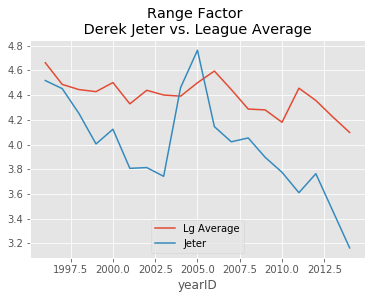

In [12]:
fig, ax = plt.subplots()
fielding.groupby('yearID')['Range_Factor'].mean().plot(ax=ax)
fielding[fielding['nameLast']=='Jeter'].set_index('yearID')['Range_Factor'].plot(ax=ax)
ax.legend(['Lg Average','Jeter'], loc=8)
plt.title('Range Factor \n Derek Jeter vs. League Average ')

Text(0.5,1,'Derek Jeter Range Factor Ranking')

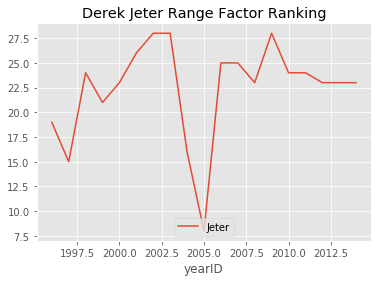

In [13]:
fig, ax = plt.subplots()
fielding[fielding['nameLast']=='Jeter'].set_index('yearID')['Range_Factor_Rank'].plot(ax=ax)
ax.legend(['Jeter'], loc=8)
plt.title('Derek Jeter Range Factor Ranking')

Text(0.5,1,'Derek Jeter SS Ranking by Fielding Metric')

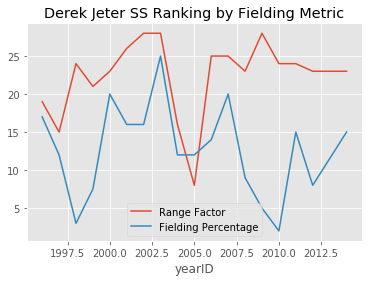

In [14]:
fig, ax = plt.subplots()
fielding[fielding['nameLast']=='Jeter'].set_index('yearID')[['Range_Factor_Rank', 'Fielding_Percentage_Rank']].plot(ax=ax)
ax.legend(['Range Factor', 'Fielding Percentage'], loc=8)
plt.title('Derek Jeter SS Ranking by Fielding Metric')

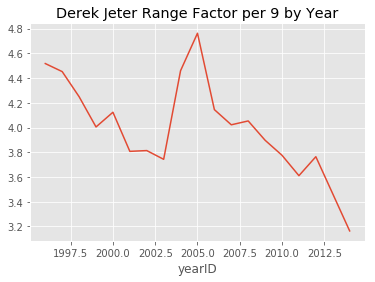

In [15]:
fielding[fielding['nameLast']=='Jeter'].set_index('yearID')['Range_Factor'].plot(title='Derek Jeter Range Factor per 9 by Year')

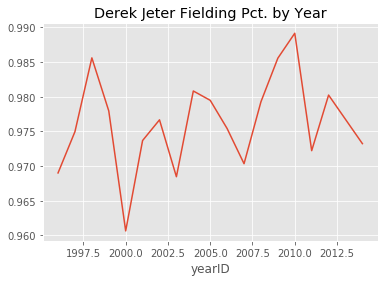

In [16]:
fielding[fielding['nameLast']=='Jeter'].set_index('yearID')['Fielding_Percentage'].plot(title='Derek Jeter Fielding Pct. by Year')

# Year over Year Correlation

In [17]:
yoy_comparison = pd.read_csv("jeter_yoy_comparison.csv")

In [18]:
yoy_comparison.dropna(inplace=True)
yoy_comparison.head()

,playerID,yearID,InnOuts,PO,A,E,playerID_2,yearID_2,InnOuts_2,PO_2,A_2,E_2
0,andruel01,2009,3714.0,261.0,407.0,22.0,andruel01,2010,3873.0,242.0,401.0,16.0
1,andruel01,2010,3873.0,242.0,401.0,16.0,andruel01,2011,3783.0,245.0,407.0,25.0
2,andruel01,2011,3783.0,245.0,407.0,25.0,andruel01,2012,3999.0,233.0,414.0,16.0
3,andruel01,2012,3999.0,233.0,414.0,16.0,andruel01,2013,3867.0,212.0,362.0,14.0
4,andruel01,2013,3867.0,212.0,362.0,14.0,andruel01,2014,3927.0,237.0,371.0,18.0


In [19]:
yoy_comparison['year1_fld_pct'] = yoy_comparison.apply(lambda row: (row['PO']+row['A'])/float(row['PO']+row['A']+row['E']), axis=1)
yoy_comparison['year2_fld_pct'] = yoy_comparison.apply(lambda row: (row['PO_2']+row['A_2'])/float(row['PO_2']+row['A_2']+row['E_2']), axis=1)

In [20]:
yoy_comparison['year1_range_factor'] = yoy_comparison.apply(lambda row: 9*((row['PO']+row['A'])/float(row['InnOuts']/(3))), axis=1)
yoy_comparison['year2_range_factor'] = yoy_comparison.apply(lambda row: 9*((row['PO_2']+row['A_2'])/float(row['InnOuts_2']/(3))), axis=1)

Text(0.98,0.945,'$p = 0.44$')

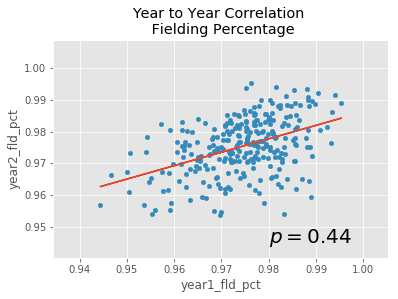

In [21]:
x = yoy_comparison['year1_fld_pct']
y = yoy_comparison['year2_fld_pct']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
pearson_r = yoy_comparison[['year1_fld_pct','year2_fld_pct']].\
            corr()['year2_fld_pct']['year1_fld_pct']

fig, ax = plt.subplots()
yoy_comparison[['year1_fld_pct','year2_fld_pct']].plot(kind='scatter', x='year1_fld_pct', y='year2_fld_pct', 
                                                       title='Year to Year Correlation \n Fielding Percentage', ax=ax)
ax.plot(x, intercept+(slope*x))
ax.text(.98, .945, '$p = %0.2f$'%pearson_r, fontsize=20)

Text(5,3.5,'$p = 0.50$')

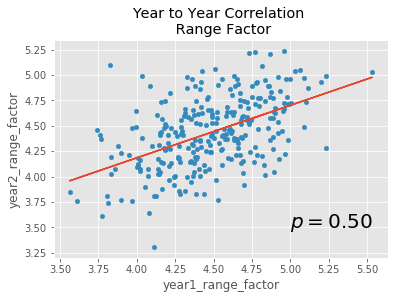

In [22]:
x = yoy_comparison['year1_range_factor']
y = yoy_comparison['year2_range_factor']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
pearson_r = yoy_comparison[['year1_range_factor','year2_range_factor']].\
            corr()['year2_range_factor']['year1_range_factor']

fig, ax = plt.subplots()
yoy_comparison[['year1_range_factor','year2_range_factor']].plot(kind='scatter', x='year1_range_factor', y='year2_range_factor', 
                                                                 title='Year to Year Correlation \n Range Factor', ax=ax)
ax.plot(x, intercept+(slope*x))
ax.text(5, 3.5, '$p = %0.2f$'%pearson_r, fontsize=20)

# Inside Edge Plots

* Used to vizualize range
* Can be found at Fangraphs: http://www.fangraphs.com/spraycharts.aspx?playerid=3395&position=2B/SS&type=fielding 

In [23]:
fielding[fielding['yearID']==2012].sort_values('Range_Factor_Rank').reset_index(drop=True)

,nameFirst,nameLast,yearID,InnOuts,PO,A,E,Fielding_Percentage,Fielding_Percentage_Rank,Range_Factor,Range_Factor_Rank
0,Cliff,Pennington,2012,3156.0,217.0,357.0,11.0,0.981197,7.0,4.910646,1.0
1,Marco,Scutaro,2012,3906.0,284.0,426.0,13.0,0.982019,6.0,4.907834,2.0
2,Asdrubal,Cabrera,2012,3483.0,223.0,408.0,19.0,0.970769,19.0,4.891473,3.0
3,J. J.,Hardy,2012,4317.0,244.0,529.0,6.0,0.992298,1.0,4.834607,4.0
4,Yunel,Escobar,2012,3753.0,240.0,431.0,12.0,0.982430,4.0,4.827338,5.0
5,Brandon,Crawford,2012,3303.0,195.0,394.0,18.0,0.970346,20.0,4.814714,6.0
6,Starlin,Castro,2012,4209.0,266.0,465.0,27.0,0.964380,24.0,4.689237,7.0
7,Mike,Aviles,2012,3378.0,208.0,375.0,15.0,0.974916,13.0,4.659858,8.0
8,Brendan,Ryan,2012,3513.0,196.0,396.0,9.0,0.985025,3.0,4.549957,9.0
9,Rafael,Furcal,2012,3102.0,173.0,349.0,15.0,0.972067,16.0,4.543520,10.0


### Jeter vs. Pennington Fielding 2012
* Using these plots we can clearly see how Pennington was able to range further out to make more difficult plays.  
Jeter's range is quite limited

* Pennington also made a couple of plays that were in the 10-40% fieldable range (orange).

<img src="https://github.com/TravisRPetersen/sports-analytics-spring18/blob/master/lesson_02/images/jeter_fielding_2012.png?raw=true", style="width: 741px height: 393px;">
<img src="https://github.com/TravisRPetersen/sports-analytics-spring18/blob/master/lesson_02/images/pennington_fielding_2012.png?raw=true", style="width: 101px height: 393px;">

## Limitations to Range Factor

* A player might have a less chances if a pitching staff strikes out a lot of batters

* A pitching staff's handedness, groundball/flyball ratio also affect the chances a fielder might get

* Park factors can also affect a fielder's total chances

* Range factor doesn't control for a team defense

## Defensive Runs Saved and Ultimate Zone Rating

* Utilize precise landing points of tracked batted balls and zone charts

#### DRS
* Invented by John Dewan and compiled by Baseball Info Solutions
    * http://www.baseballinfosolutions.com/Innovations/DefensiveRunsSaved
    * http://www.fangraphs.com/library/defense/drs/

* Defensive Runs Saved has a year over year correlation coefficient of .59
    * https://www.billjamesonline.com/how_well_do_advanced_defensive_statistics_correlate/

#### UZR
* Invented and compiled by Mitchel Lichtman
    * http://www.fangraphs.com/blogs/the-fangraphs-uzr-primer/

References:
* http://sabr.org/research/measuring-defense-entering-zones-fielding-statistics

## Using these stats we can look into the 2005 season where Jeter finished top 10 according to Range Factor

In [24]:
adv_frame = pd.read_csv('advanced_SS_stats_05.csv')

In [25]:
adv_frame['FP_Rank'] = adv_frame['FP'].rank(ascending=False)
adv_frame['RF_Rank'] = adv_frame['Range_Factor'].rank(ascending=False)
adv_frame['DRS_Rank'] = adv_frame['DRS'].rank(ascending=False)
adv_frame['UZR_Rank'] = adv_frame['UZR'].rank(ascending=False)

In [26]:
adv_frame

,Name,PO,A,E,FP,Range_Factor,DRS,UZR,FP_Rank,RF_Rank,DRS_Rank,UZR_Rank
0,Orlando Cabrera,229,347,7,0.988,4.177276,6,19.6,1.5,22.0,7.5,1.0
1,Jack Wilson,246,522,14,0.982,5.088971,32,14.3,4.5,3.0,1.0,2.0
2,Adam Everett,209,420,14,0.978,4.388545,25,13.7,10.0,16.0,2.0,3.0
3,Juan Uribe,250,422,16,0.977,4.670534,6,7.5,11.5,9.0,7.5,4.0
4,Omar Vizquel,234,426,8,0.988,4.597523,1,6.9,1.5,12.0,12.0,5.0
5,Neifi Perez,175,385,10,0.983,4.686737,17,6.4,3.0,8.0,5.0,6.0
6,Rafael Furcal,256,504,15,0.981,5.230475,24,4.3,7.0,1.0,3.0,7.0
7,J.J. Hardy,133,259,10,0.975,3.761194,8,4.1,13.0,25.0,6.0,8.0
8,Julio Lugo,311,424,24,0.968,4.933532,-5,1.9,22.0,4.0,17.5,9.0
9,Jimmy Rollins,208,411,12,0.981,4.101770,18,0.5,7.0,24.0,4.0,11.0


## More advanced methods like DRS and UZR demonstrate that Jeter was likely one of the worst SS in 2005, ranking 24th in the MLB among qualified SS

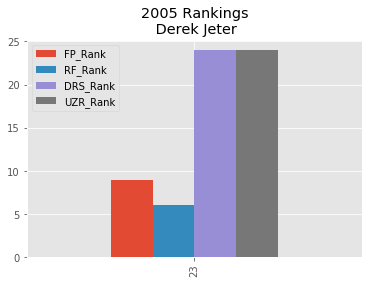

In [27]:
adv_frame.query('Name=="Derek Jeter"')[['FP_Rank',
                                        'RF_Rank',
                                        'DRS_Rank',
                                        'UZR_Rank']].plot(title='2005 Rankings\n Derek Jeter', kind="bar")

# Takeaways
* Don't be fooled by popular opinion - don't be afraid to question established beliefs
* Build tidy dataframes, and make sure to clean up the data
* Use visualization to demonstrate your findings